## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.append("..")

## FITZHUGNAGUMO TEST

In [5]:
from scripts.datagen.fitzhugnagumo import FitzhugNagumo
from scripts.utils.params import *

prms_theta = SolverParams.get_from_file(
    filedir="../scripts/utils/parameters_files/parameters_theta.txt"
)
FN_theta = FitzhugNagumo(prms_theta, 1, 0.2, 0.01, 2, 0.1, (5, 5))

nome = "test_rapido_theta.npy"
FN_theta.generate_sample(nome)

sample_theta = np.load("../dataset/samples/" + nome)


prms_RK = SolverParams.get_from_file(
    filedir="../utils/parameters_files/parameters_RKexpl.txt"
)
FN_RK = FitzhugNagumo(prms_RK, 1, 0.2, 0.01, 2, 0.1, (5, 5))

nome = "test_rapido_RK.npy"
FN_RK.generate_sample(nome)

sample_RK = np.load("../dataset/samples/" + nome)

plt.plot(sample_theta[:, 1, 1, 0], "r.-")
plt.plot(sample_RK[:, 1, 1, 0], "b-")
plt.plot(sample_theta[:, 1, 1, 1], "g.-")
plt.plot(sample_RK[:, 1, 1, 1], "k-")
plt.title("Solution")
plt.legend(["u_theta", "u_RK", "v_theta", "v_RK"])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../dataset/samples/test_rapido_theta.npy'

## Testing equation

$$ 
\begin{cases} 
    x' = -y\\
    y' = x \\
    x(0) = 1 \\
    y(0) = 1
\end{cases}
$$
$$
x_{ex}(t) = \cos(t) - \sin(t)\\
y_{ex}(t) = \cos(t) + \sin(t)
$$

## Hyperparameters

In [ ]:
from scripts.utils.params import *

T = 6.3
dt = 0.02
u0 = [1, 1]


def f(v, t):
    return np.array([-v[1], v[0]])


def u_ex(t):
    return np.cos(t) - np.sin(t)


def v_ex(t):
    return np.cos(t) + np.sin(t)


# prms = SolverParams(final_time=T,time_step=dt,u0=u0)

## Theta Method

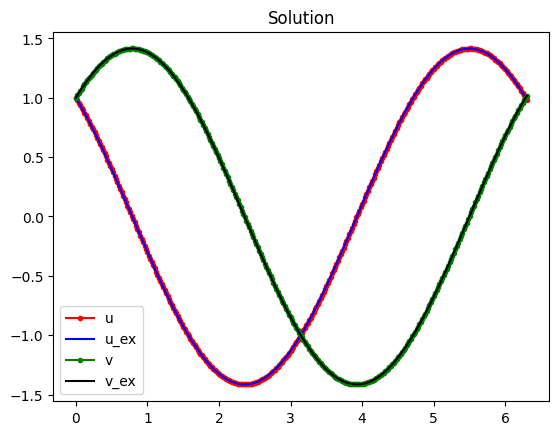

In [ ]:
from scripts.particle.thetamethod import ThetaMethod

# prms = SolverParams.get_from_file(filedir='../utils/parameters_files/parameters_theta.txt')

# print(prms.theta)

# TM = ThetaMethod(prms,f)

TM = ThetaMethod("../utils/parameters_files/parameters_theta.txt", f)

TM.generate()

plt.plot(TM.t, TM.u[0, :], "r.-")
plt.plot(TM.t, u_ex(TM.t), "b-")
plt.plot(TM.t, TM.u[1, :], "g.-")
plt.plot(TM.t, v_ex(TM.t), "k-")
plt.title("Solution")
plt.legend(["u", "u_ex", "v", "v_ex"])
plt.show()

## Runge-Kutta

### Explicit

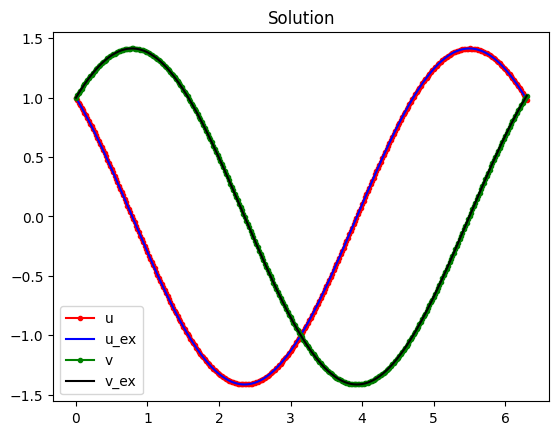

In [ ]:
from scripts.particle.rungekutta import RKExplicit

prms = SolverParams.get_from_file(
    filedir="../utils/parameters_files/parameters_RKexpl.txt"
)

RK = RKExplicit(prms, f=f)
# RK = RKExplicit('../utils/parameters_files/parameters_RKexpl.txt',f)

RK.generate()

plt.plot(RK.t, RK.u[0, :], "r.-")
plt.plot(RK.t, u_ex(RK.t), "b-")
plt.plot(RK.t, RK.u[1, :], "g.-")
plt.plot(RK.t, v_ex(RK.t), "k-")
plt.title("Solution")
plt.legend(["u", "u_ex", "v", "v_ex"])
plt.show()

### Implicit

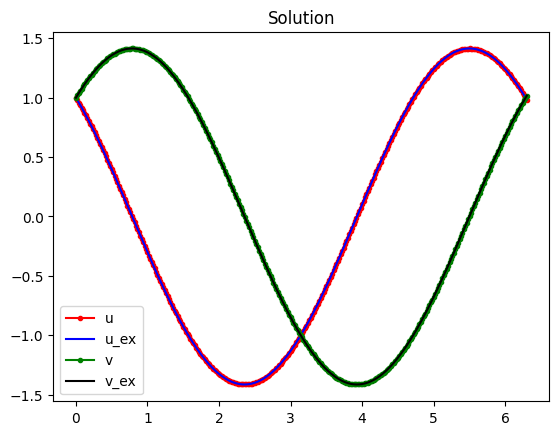

In [ ]:
from scripts.particle.rungekutta import RKImplicit

prms = SolverParams.get_from_file(
    filedir="../utils/parameters_files/parameters_RKimpl.txt"
)
RK = RKImplicit(prms, f)

RK.generate()

plt.plot(RK.t, RK.u[0, :], "r.-")
plt.plot(RK.t, u_ex(RK.t), "b-")
plt.plot(RK.t, RK.u[1, :], "g.-")
plt.plot(RK.t, v_ex(RK.t), "k-")
plt.title("Solution")
plt.legend(["u", "u_ex", "v", "v_ex"])
plt.show()

### Semi-Implicit

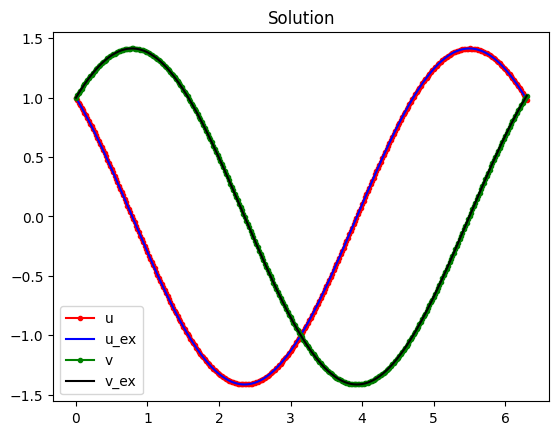

In [ ]:
from scripts.particle.rungekutta import RKSemiImplicit

prms = SolverParams.get_from_file(
    filedir="../utils/parameters_files/parameters_RKsemimpl.txt"
)
RK = RKSemiImplicit("../utils/parameters_files/parameters_RKsemimpl.txt", f)

RK.generate()

plt.plot(RK.t, RK.u[0, :], "r.-")
plt.plot(RK.t, u_ex(RK.t), "b-")
plt.plot(RK.t, RK.u[1, :], "g.-")
plt.plot(RK.t, v_ex(RK.t), "k-")
plt.title("Solution")
plt.legend(["u", "u_ex", "v", "v_ex"])
plt.show()

## Multistep

### Adams-Bashforth

In [ ]:
from scripts.particle.multistep import AdamsBashforth

prms = SolverParams.get_from_file(
    filedir="../utils/parameters_files/parameters_multistep.txt"
)
MS = AdamsBashforth(prms, f)

MS.generate()

plt.plot(MS.t, MS.u[0, :], "r.-")
plt.plot(MS.t, u_ex(MS.t), "b-")
plt.plot(MS.t, MS.u[1, :], "g.-")
plt.plot(MS.t, v_ex(MS.t), "k-")
plt.title("Solution")
plt.legend(["u", "u_ex", "v", "v_ex"])
plt.show()

ModuleNotFoundError: No module named 'scripts'